In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import glob
import os
import numpy as np
import pandas as pd
import gffutils
import pysam
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import OrderedDict
from tqdm import tnrange, tqdm_notebook
from matplotlib_venn import venn2, venn3

pd.set_option('display.max_columns', 150)

In [2]:
input_dir = ''
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/'

In [3]:
fgs = [
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SLBP_1000_72hr_merged_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Tia1_1000ng_1_S14_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Tia1_1000ng_2_S27_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SLBP_1000_72hr_A_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SLBP_1000_72hr_B_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
    '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SLBP_1000_72hr_C_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed',
]

bg = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed'

In [4]:
def stringify_coords(row):
    st = "{}:{}-{}:{}".format(
        row['chrom'], row['start'], row['end'], row['strand']
    )
    if not st.startswith('chr'):
        return 'chr' + st
    else:
        return st
    
def overlap(fg, bg, conf=0, output_dir=output_dir):
    fg_label = os.path.basename(fg).replace('.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed','')
    bg_label = os.path.basename(bg).replace('.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed','')
    
    names = ['chrom','start','end','conf','frac','strand']
    df1 = pd.read_csv(fg, sep='\t', names=names)
    df2 = pd.read_csv(bg, sep='\t', names=names)
    df1 = df1[df1['conf']>=conf]
    df2 = df2[df2['conf']>=conf]
    
    df1['coord'] = df1.apply(stringify_coords, axis=1)
    df2['coord'] = df2.apply(stringify_coords, axis=1)
    fig, ax = plt.subplots(figsize=(5, 5))
    venn2([set(df1['coord']), set(df2['coord'])], [fg_label, bg_label], ax=ax)
    print(len(set(df1['coord'])), len(set(df1['coord']).intersection(set(df2['coord']))))
    fig.suptitle(
        "Overlap at conf {}: ({}% of all {} edits)".format(
            conf, 
            100*len(set(df1['coord']).intersection(set(df2['coord'])))/len(set(df1['coord'])),
            df1.shape[0]
        )
    )
    fig.savefig(os.path.join(output_dir, '{}_{}_conf{}.svg'.format(os.path.basename(fg_label), os.path.basename(bg_label), conf)))

403256 13467
535897 15075
103082 2387
60029 3328
58994 3518
37819 1354
45348 1523
43874 1544
399239 12846
530287 14351
102698 2145
59900 3107
58858 3296
37691 1188
45199 1348
43724 1356
197208 2508
244266 2450
35011 634
24581 655


/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


22901 645
15173 405
16172 443
16463 470
69554 596
75014 562
1550 371
2335 234
2487 245
552 232
637 245
624 250


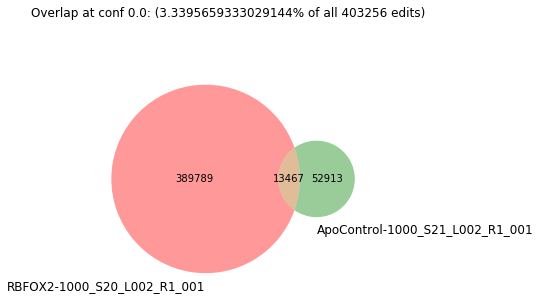

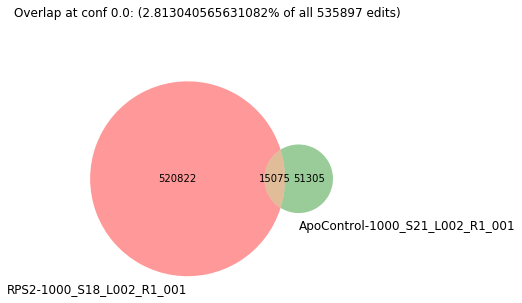

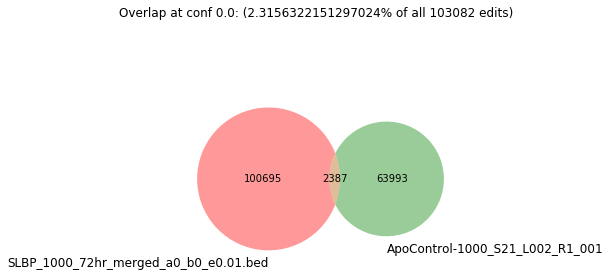

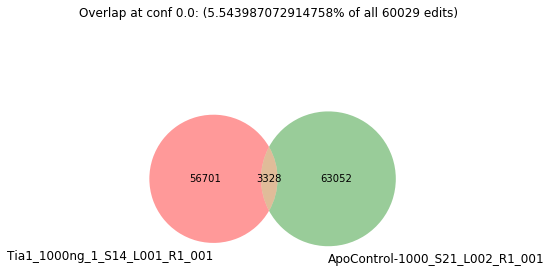

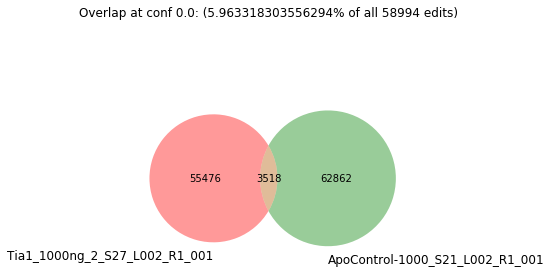

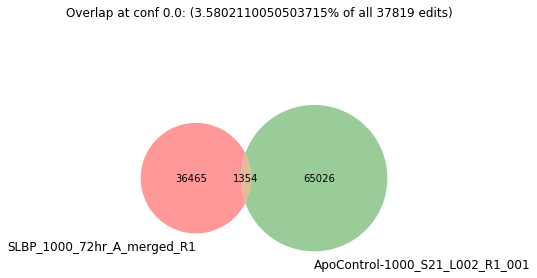

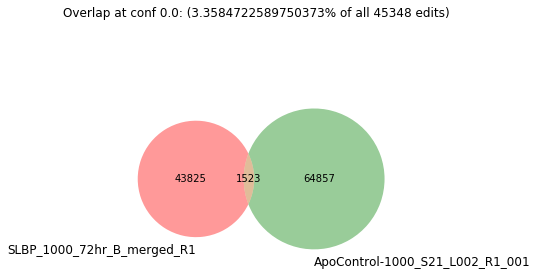

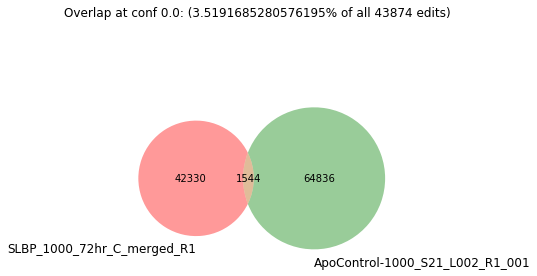

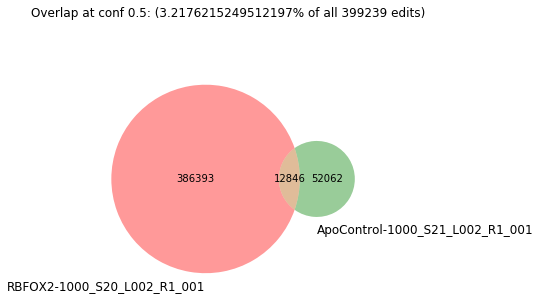

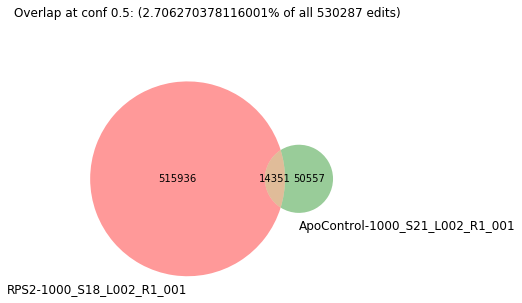

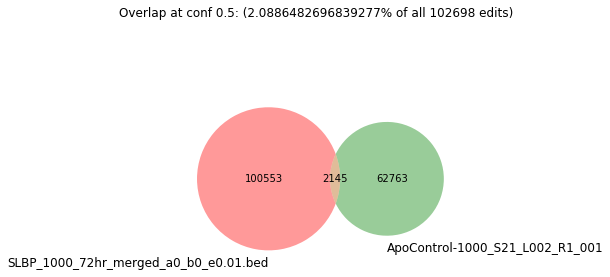

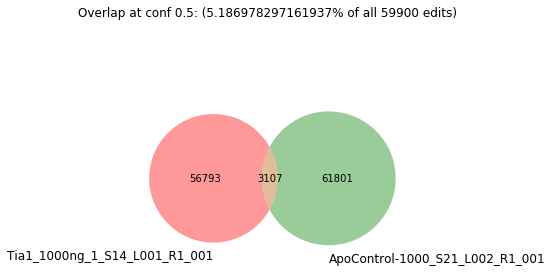

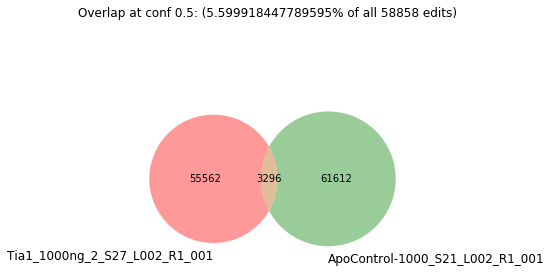

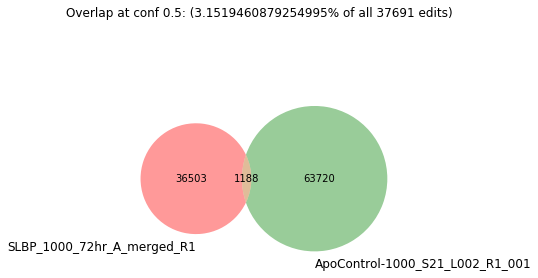

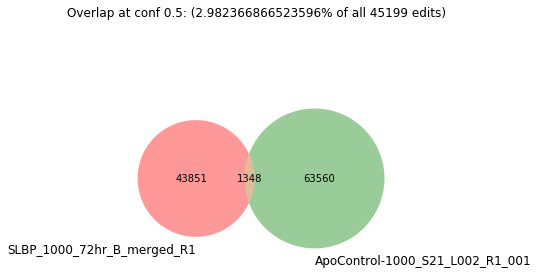

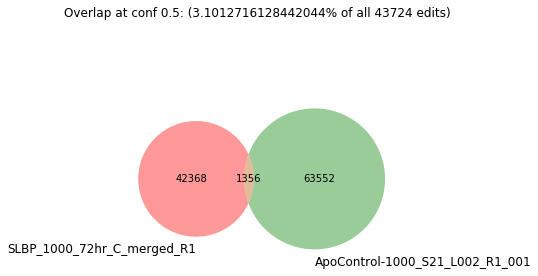

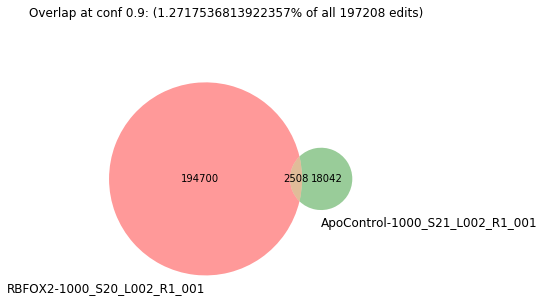

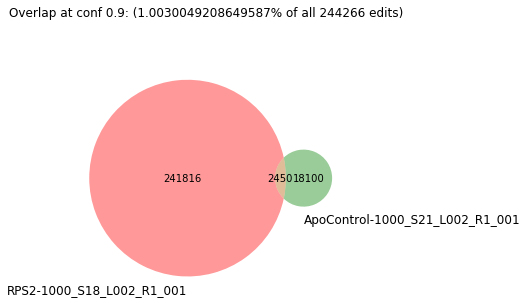

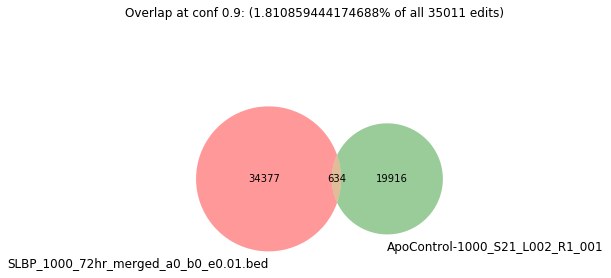

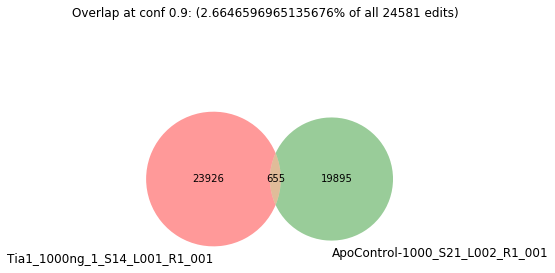

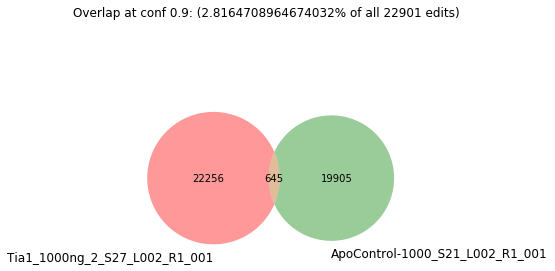

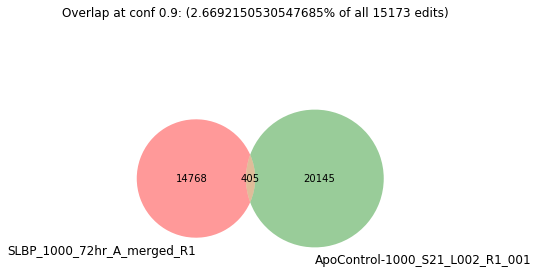

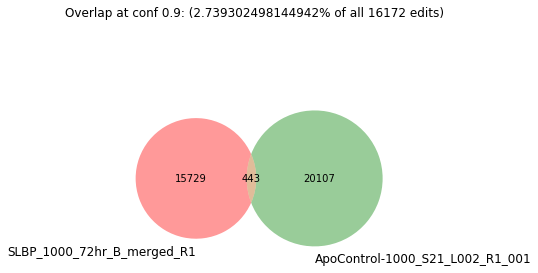

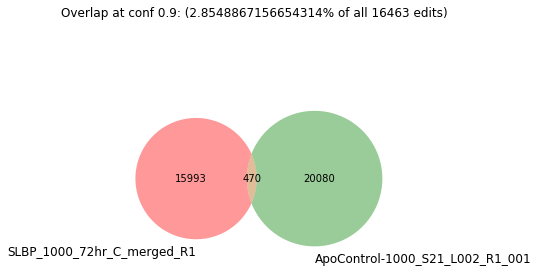

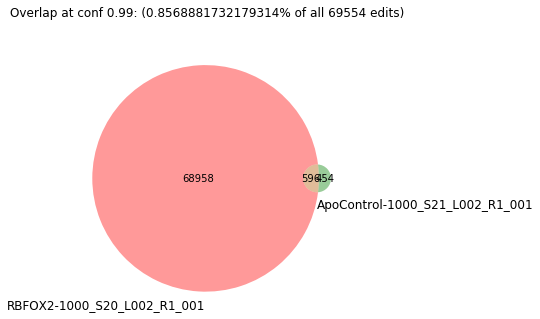

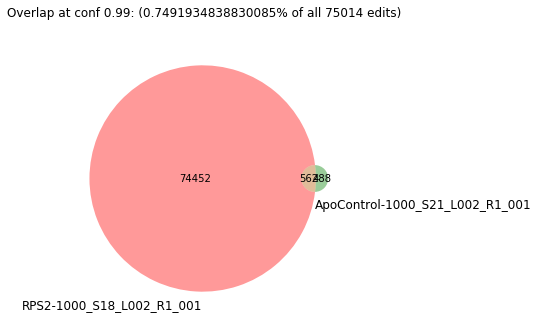

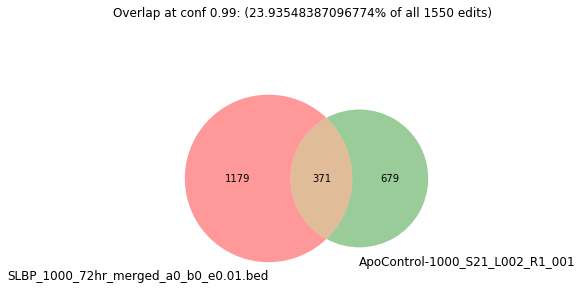

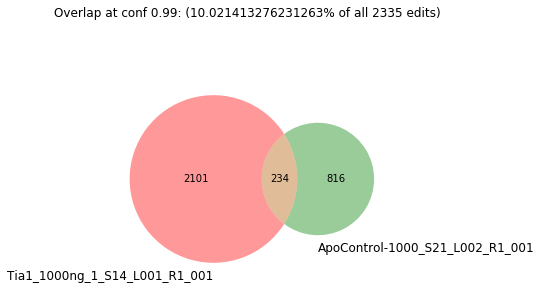

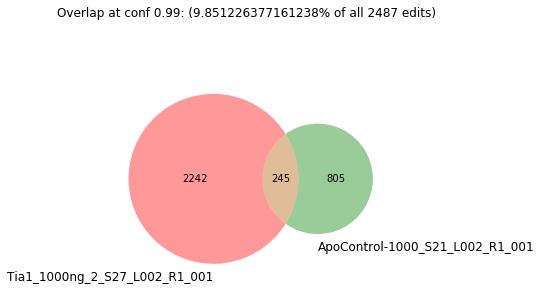

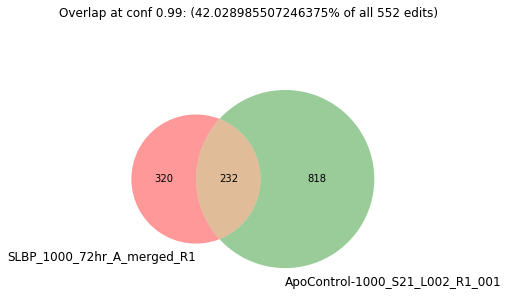

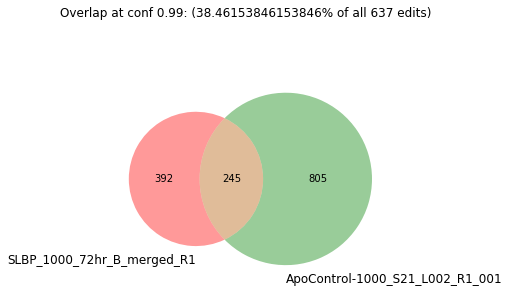

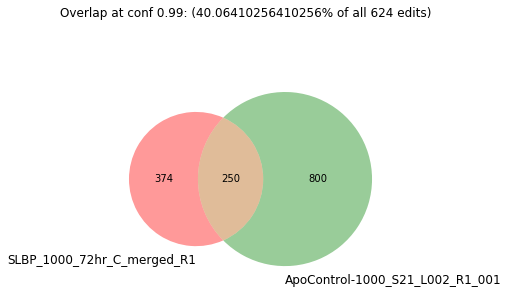

In [6]:
for conf in [0.0, 0.5, 0.9, 0.99]:
    for fg in fgs:
        overlap(fg, bg, conf=conf, output_dir=output_dir)